# Assignement 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

### 2.1 Linear Regression with Scikit-learn on Linnerud dataset

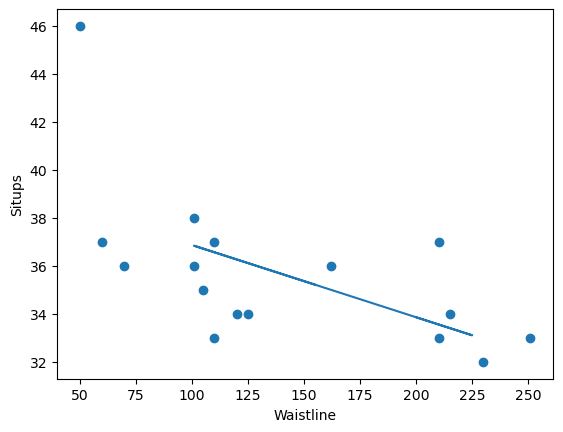

Mean-squared error is:  2.3977141782134432


In [2]:
# import linnerude dataset
df = sklearn.datasets.load_linnerud()

# Waistline and situps acomplished
waistline = df.data[:,1]
situps = df.target[:,1]


#Reshape the data
waistline = waistline.reshape(-1,1)
situps = situps.reshape(-1,1)

# create a regression model
model = LinearRegression()

# Splits the data into training and testing sets
waist_train, waist_test, situps_train, situps_test = sklearn.model_selection.train_test_split(waistline,situps,test_size=0.2)

# Fit the model
model.fit(waist_train,situps_train)

# Predict the model
situps_predict = model.predict(waist_test)

#Plot the relationship between waistline and situps
plt.scatter(waist_train,situps_train)
plt.plot(waist_test,situps_predict)
plt.xlabel('Waistline')
plt.ylabel('Situps')
plt.show()

#  Mean-squared error is
print('Mean-squared error is: ',sklearn.metrics.mean_squared_error(situps_test,situps_predict))



In [3]:
# Import the pumpkin dataset
pumpkins = pd.read_csv('US-pumpkins copy.csv')

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package','High Price','Low Price']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)


new_pumpkins.info


<bound method DataFrame.info of       City Name  Package  Variety  Low Price  High Price  Origin  Item Size  \
2             1        3        4         29          26       3          3   
3             1        3        4         29          26      17          3   
4             1        3        4         16          14       5          2   
5             1        3        4         16          14       5          2   
6             1        4        4         29          28       5          3   
...         ...      ...      ...        ...         ...     ...        ...   
1694         12        3        5         27          23       4          6   
1695         12        3        5         27          23       4          6   
1696         12        3        5         27          23       4          6   
1697         12        3        5         27          23       4          6   
1698         12        3        5         27          23       4          6   

      Color  
2    

confusion_matrix is:  [[161   0]
 [ 38   0]]


c:\Users\atlen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\atlen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

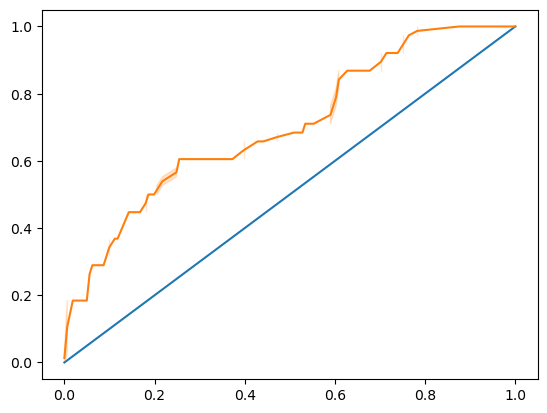

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

Selected_features = ['Origin','Item Size','Variety','Package','Low Price', 'City Name', 'High Price']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)

# Create the model
model = sklearn.linear_model.LogisticRegression()

# Fit the model
model.fit(X_train,y_train)
prediction = model.predict(X_test)

# Confusion matrix
print('confusion_matrix is: ',confusion_matrix(y_test,prediction))


y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr, tpr)


### 2.3 Digit Classification with Artificial Neural Networks

In [5]:
import warnings
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

In [6]:
# Fetch the dataset
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
X = X/255.0

In [7]:
# Split the data into training and testing sets, with a ratio of 60'000:10'000
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [13]:
# set up MLP Classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=15,
    alpha=1e-4,
    solver="sgd",
    verbose=True,
    random_state=10,
    learning_rate_init=0.1
)

In [14]:
# We probably won't converge so we'll catch the warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32202861
Iteration 2, loss = 0.14817606
Iteration 3, loss = 0.11088751
Iteration 4, loss = 0.09059038
Iteration 5, loss = 0.07639721
Iteration 6, loss = 0.06802425
Iteration 7, loss = 0.06006656
Iteration 8, loss = 0.05351314
Iteration 9, loss = 0.04812838
Iteration 10, loss = 0.04470405
Iteration 11, loss = 0.04060422
Iteration 12, loss = 0.03568328
Iteration 13, loss = 0.03277231
Iteration 14, loss = 0.03009950
Iteration 15, loss = 0.02751663


In [15]:
# print out the model scores
print(f"Training set score: {mlp.score(X_train, y_train)}")
print(f"Test set score: {mlp.score(X_test, y_test)}")

Training set score: 0.99045
Test set score: 0.9695


We could make the model better by training the model with more iterations. We must however be carefull to not overfit the model!
We could also try and tune the hyperparameters